In [18]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [19]:
import pandas as pd
sales= pd.read_csv('https://raw.githubusercontent.com/shahedshaikh/data/master/train%20(1).csv')

sales.head(10)


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
5,2013-01-06,1,1,12
6,2013-01-07,1,1,10
7,2013-01-08,1,1,9
8,2013-01-09,1,1,12
9,2013-01-10,1,1,9


check null value

In [20]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


drop store iteam columns

In [21]:
sales =sales[['date', 'sales']]
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   sales   913000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 13.9+ MB


convert the date datatype

In [22]:
sales['date']=pd.to_datetime(sales['date'])
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 13.9 MB


convert date to month period,and then sum the number of iteams in each month

In [23]:
sales['date']= sales['date'].dt.to_period("M")
monthly_sales =sales.groupby('date').sum().reset_index()

convert the resulting date column to timestamp datatype

In [24]:
# prompt: convert the resulting date column to timestamp datatype

import pandas as pd
monthly_sales['date']=monthly_sales['date'].dt.to_timestamp()


In [70]:
monthly_sales.head(10)

,date,sales,sales_diff
1,2013-02-01,459417,4513.0
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0
6,2013-07-01,855922,60325.0
7,2013-08-01,766761,-89161.0
8,2013-09-01,689907,-76854.0
9,2013-10-01,656587,-33320.0
10,2013-11-01,692643,36056.0


In [26]:
# prompt: Using dataframe monthly_sales: date,Sales in line chart

import altair as alt
chart = alt.Chart(monthly_sales).mark_line().encode(x='date', y='sales')
chart


alt.Chart(...)

Visulization

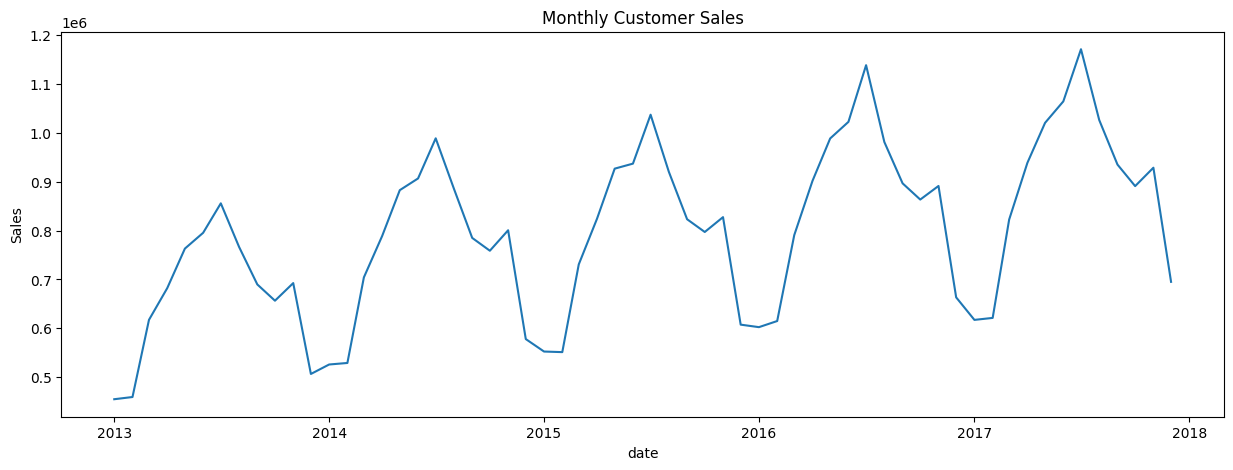

In [28]:
# prompt:  plt.figure(figsize=(15,5)) plt.plot(monthly_sales['date'],monthly_sales['sales']) plt.xlabel("date") plt.ylabel("Sales") plt.title("Monthly Customer Sales") plt.show

import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'],monthly_sales['sales'])
plt.xlabel("date")
plt.ylabel("Sales")
plt.title("Monthly Customer Sales")
plt.show()


call the differance on tha sales colu mn to make the sales data stationery

In [34]:
# prompt: call the differance on tha sales colu mn to make the sales data stationery

monthly_sales['sales_diff'] = monthly_sales['sales'].diff()
monthly_sales=monthly_sales.dropna()


In [35]:
monthly_sales.head(10)

,date,sales,sales_diff
1,2013-02-01,459417,4513.0
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0
6,2013-07-01,855922,60325.0
7,2013-08-01,766761,-89161.0
8,2013-09-01,689907,-76854.0
9,2013-10-01,656587,-33320.0
10,2013-11-01,692643,36056.0


<function matplotlib.pyplot.show(close=None, block=None)>

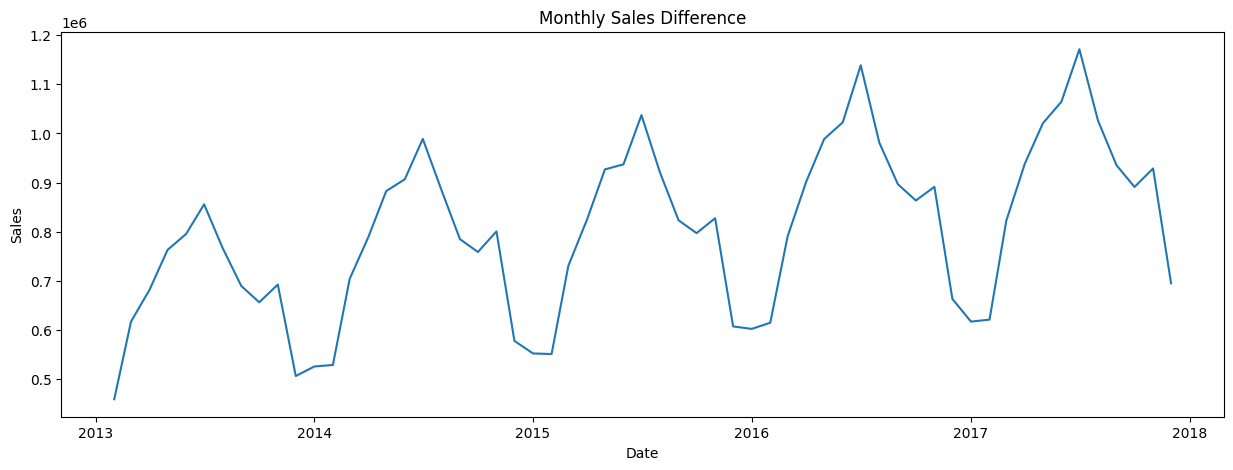

In [72]:
# prompt: show in line chart monthly sales differance

plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'],monthly_sales['sales'])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Sales Difference")
plt.show

Dropping Sales and Date

In [38]:
# prompt: Dropping Sales and Date variable name as supervised_data

supervised_data = monthly_sales.drop(['sales', 'date'], axis=1)


Preparing the supervised data

In [41]:
# prompt: for i in range(1,13): col_name 'month' + str(i) supervised_data[col_name] = supervised_data['sales_diff'].shift(i)  supervised_data = supervised_data.dropna().reset_index(drop=True)  supervised_data.head(10)

for i in range(1,13):
  col_name = 'month' + str(i)
  supervised_data[col_name] = supervised_data['sales_diff'].shift(i)
supervised_data = supervised_data.dropna().reset_index(drop=True)
supervised_data.head(10)


,sales_diff,month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12
0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0,4513.0
1,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0
2,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0
3,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0
4,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0
5,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0
6,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0
7,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0
8,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0
9,41900.0,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0


split the data into train and test

In [43]:
# prompt: train_data = supervised_data[:-12] test_data = supervised_data[-12:] print("Train Data Shape: ", train_data.shape) print("Test Data Shape: ", test_data.shap

train_data = supervised_data[:-12]
test_data = supervised_data[-12:]

print("Train Data Shape: ", train_data.shape)
print("Test Data Shape: ", test_data.shape)


Train Data Shape:  (35, 13)
Test Data Shape:  (12, 13)


In [45]:
# prompt: scaler = MinMaxScaler (feature_range=(-1,1)) scaler.fit(train_data) train_data = scaler.transform(train_data) test_data = scaler.transform(test_data)

scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


In [46]:
# prompt:  X_train, y_train = train_data[:,1:], train_data[:,0:1] k_test, y_test = test_data[:,1:], test_data[:,0:1] y_train y_train.ravel() = y_test = y_test.ravel() print("x_train Shape: ", X_train.shape) print("y_train Shape: , y_train. shape) print("X_test Shape: ", X_test.shape) print("y_test Shape: ", y_test.shape)

X_train, y_train = train_data[:,1:], train_data[:,0:1]
X_test, y_test = test_data[:,1:], test_data[:,0:1]
y_train = y_train.ravel()
y_test = y_test.ravel()
print("x_train Shape: ", X_train.shape)
print("y_train Shape: ", y_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_test Shape: ", y_test.shape)


x_train Shape:  (35, 12)
y_train Shape:  (35,)
X_test Shape:  (12, 12)
y_test Shape:  (12,)


Male prediction data frame to merge the predicted sales prices of all trained algs

In [48]:
# prompt: sales_dates=monthly_sales['date'][-12:].reset_index(drop=true) predict_df=pd.Dataframe(sales_dates)

import pandas as pd
sales_dates=monthly_sales['date'][-12:].reset_index(drop=True)
predict_df=pd.DataFrame(sales_dates)
predict_df.columns=['date']


In [49]:
act_sales=monthly_sales['sales'][-13:].to_list()
print(act_sales)

[663411, 617306, 621369, 822667, 938862, 1020686, 1064624, 1171393, 1026403, 935263, 891160, 928837, 695170]


Create linear regression model and predict the output

In [53]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
lr_pre=lr_model.predict(X_test)


In [54]:
# prompt: lr_pre=lr_pre.reshape(-1,1) lr_pre_test_set=np.concatenate([1r_pre, X_test], axis=1) lr_pre_test_set=scaler.inverse_transform(1r_pre_test_set)

import numpy as np
lr_pre = lr_pre.reshape(-1, 1)
lr_pre_test_set = np.concatenate([lr_pre, X_test], axis=1)
lr_pre_test_set = scaler.inverse_transform(lr_pre_test_set)


In [60]:
# prompt:  result_list =[] for index in range(0, len(1r_pre_test_set)): result_list.append(1r_pre_test_set[index][0] + act_sales [index]) 1r_pre_series = pd.Series (result_list, name="Linear Prediction") predict_df = predict_df.merge (1r_pre_series, left_index = True, right_index= True)

import pandas as pd
result_list =[]
for index in range(0, len(lr_pre_test_set)):
  result_list.append(lr_pre_test_set[index][0] + act_sales[index])
lr_pre_series = pd.Series(result_list, name="Linear Prediction")
predict_df = predict_df.merge(lr_pre_series, left_index=True, right_index=True)


In [61]:
# prompt: # print(predict_df) lr_mse = np.sqrt(mean_squared_error(predict_df['Linear Prediction'], monthly_sales['sales'][-12:])) 1r_mae mean_absolute_error(predict_df['Linear Prediction'], monthly_sales['sales'][-12:]) 1r_r2 = = r2_score (predict_df['Linear Prediction'], monthly_sales ['sales'][-12:]) print("Linear Regression MSE: ", lr_mse ) print("Linear Regression MAE: ", 1r_mae ) print("Linear Regressi

import numpy as np
#print(predict_df)
lr_mse = np.sqrt(mean_squared_error(predict_df['Linear Prediction'], monthly_sales['sales'][-12:]))
lr_mae = mean_absolute_error(predict_df['Linear Prediction'], monthly_sales['sales'][-12:])
lr_r2 = r2_score(predict_df['Linear Prediction'], monthly_sales['sales'][-12:])
print("Linear Regression MSE: ", lr_mse)
print("Linear Regression MAE: ", lr_mae)
print("Linear Regression R2: ", lr_r2)


Linear Regression MSE:  16221.272385416869
Linear Regression MAE:  12433.184266490736
Linear Regression R2:  0.9906152516380969


Visulization of the prediction against the eh actual sales

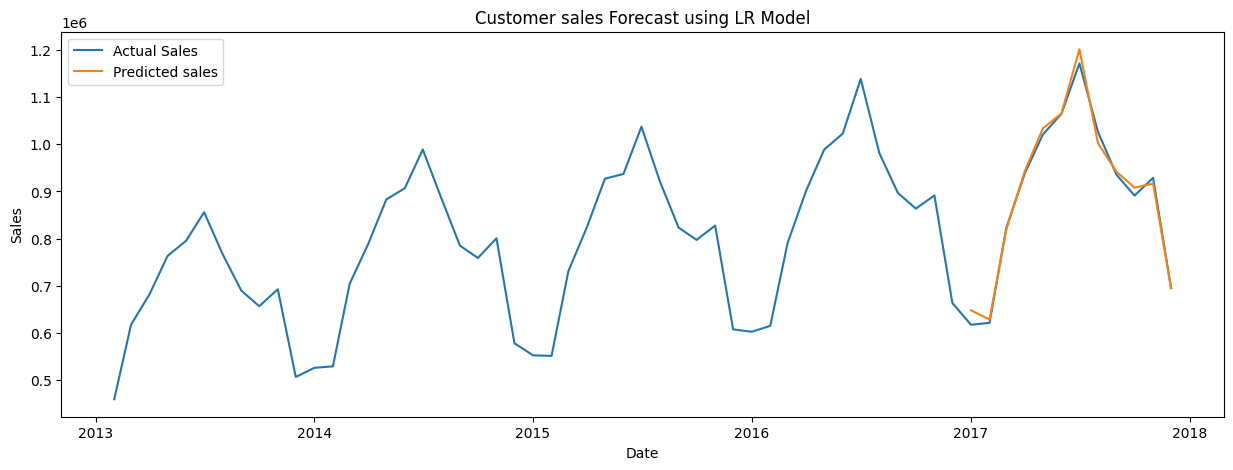

In [63]:
# prompt: plt.figure(figsize=(15,5))  # Actual sales plt.plot(monthly_sales['date'], monthly_sales['sales']) # Predicted sales plt.plot(predict_df['date'], predict_df[ 'Linear Prediction']) plt.title("Customer sales Forecast using LR Model") plt.xlabel("Date") plt.ylabel("Sales") plt.legend (['Actual Sales', 'Predicted sales']) plt.show()

import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
# Actual sales
plt.plot(monthly_sales['date'], monthly_sales['sales'])

# Predicted sales
plt.plot(predict_df['date'], predict_df['Linear Prediction'])

plt.title("Customer sales Forecast using LR Model")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend (['Actual Sales', 'Predicted sales'])
plt.show()


In [76]:
# prompt: model accuracy

# Calculate the model's accuracy
accuracy = lr_model.score(X_test, y_test)

# Print the model's accuracy
print("Model accuracy:", accuracy)


Model accuracy: 0.9806758070651099
